<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. 

Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #FF8C00;">Libraries</h1>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

              Asset1  Asset2     Asset3  Asset4  Asset5
date                                                   
2019-01-02  231.5061  55.875  25.649222  302.93   50.89
2019-01-03  231.0356  54.977  25.503047  302.11   50.41
2019-01-04  230.4026  56.129  26.147133  301.77   51.38
2019-01-07  230.0543  56.838  25.955277  302.33   52.14
2019-01-08  229.7012  56.895  26.137997  303.42   52.13
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 783 entries, 2019-01-02 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Asset1  783 non-null    float64
 1   Asset2  783 non-null    float64
 2   Asset3  783 non-null    float64
 3   Asset4  783 non-null    float64
 4   Asset5  783 non-null    float64
dtypes: float64(5)
memory usage: 36.7 KB
None


<Figure size 1200x600 with 0 Axes>

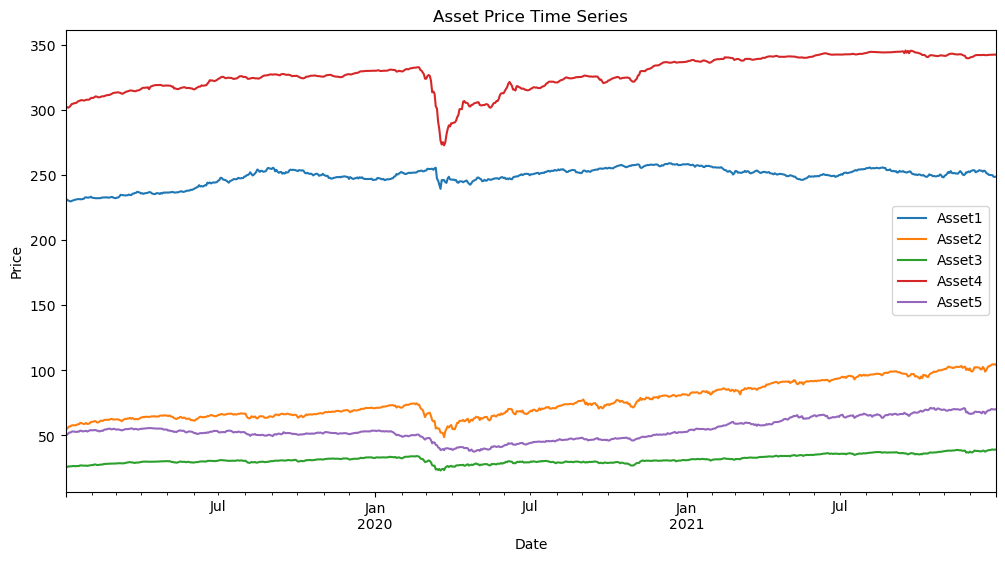

<Figure size 1200x600 with 0 Axes>

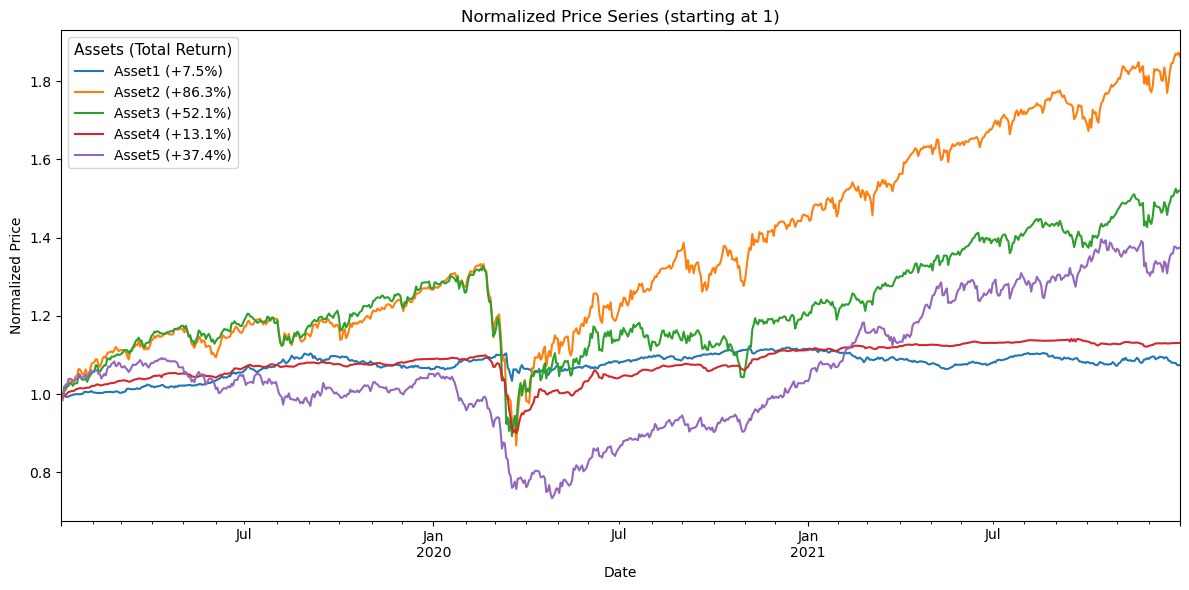

In [15]:
df = pd.read_csv(
    "/home/rafael/Área de Trabalho/CUROS IRONHACK/SEMANA_11/portfolio_analysis/data/raw/asset_price_data.csv", 
    parse_dates=["date"], 
    index_col="date"
)

# --- CORREÇÃO IMPORTANTE ---
df = df.ffill().bfill()   # Preenche NaNs antes de qualquer cálculo

print(df.head())
print(df.info())

# ============================
# Plot Raw Price Data (SEM ALTERAÇÕES)
# ============================

plt.figure(figsize=(12,6))
df.plot(title="Asset Price Time Series", figsize=(12,6))
plt.ylabel("Price")
plt.xlabel("Date")
plt.show()

# ============================
# Normalize Price Series + % FINAL NA LEGENDA
# ============================

normalized_df = df / df.iloc[0]   # divide by first row for each asset

plt.figure(figsize=(12,6))

ax = normalized_df.plot(title="Normalized Price Series (starting at 1)", figsize=(12,6))
plt.ylabel("Normalized Price")
plt.xlabel("Date")

# Calcular retorno final com NaNs já corrigidos
final_returns = (normalized_df.iloc[-1] - 1) * 100

# Capturar cores
handles, labels = ax.get_legend_handles_labels()

# Nova legenda
legend_labels = [
    f"{asset} ({final_returns[asset]:+.1f}%)" 
    for asset in normalized_df.columns
]

plt.legend(handles, legend_labels, title="Assets (Total Return)", fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()


In [11]:
print(df.iloc[0])


Asset1    231.506100
Asset2     55.875000
Asset3     25.649222
Asset4    302.930000
Asset5     50.890000
Name: 2019-01-02 00:00:00, dtype: float64


In [12]:
print(df.iloc[-1])


Asset1    248.7545
Asset2    104.1060
Asset3     39.0050
Asset4    342.5900
Asset5         NaN
Name: 2021-12-31 00:00:00, dtype: float64


In [13]:
df["Asset5"].isna().sum()


20

In [14]:
df["Asset5"].tail(15)


date
2021-12-13    67.95
2021-12-14    67.58
2021-12-15    66.80
2021-12-16    68.15
2021-12-17    67.88
2021-12-20    66.60
2021-12-21    67.93
2021-12-22    68.81
2021-12-23    69.18
2021-12-24      NaN
2021-12-27    70.11
2021-12-28    70.03
2021-12-29    69.81
2021-12-30    69.91
2021-12-31      NaN
Name: Asset5, dtype: float64

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>

In [4]:
daily_returns = df.pct_change().dropna()
daily_returns.head()

/tmp/ipykernel_20124/4028424277.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = df.pct_change().dropna()


,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-03,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2019-01-04,-0.002740,0.020954,0.025255,-0.001125,0.019242
2019-01-07,-0.001512,0.012632,-0.007338,0.001856,0.014792
2019-01-08,-0.001535,0.001003,0.007040,0.003605,-0.000192
2019-01-09,0.001976,0.012919,0.002272,0.004120,0.014003


<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>

In [5]:
correlation_matrix = daily_returns.corr()
print(correlation_matrix)

          Asset1    Asset2    Asset3    Asset4    Asset5
Asset1  1.000000 -0.088341 -0.061253  0.102252 -0.106484
Asset2 -0.088341  1.000000  0.852491  0.526634  0.591399
Asset3 -0.061253  0.852491  1.000000  0.511550  0.557414
Asset4  0.102252  0.526634  0.511550  1.000000  0.421155
Asset5 -0.106484  0.591399  0.557414  0.421155  1.000000


<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>

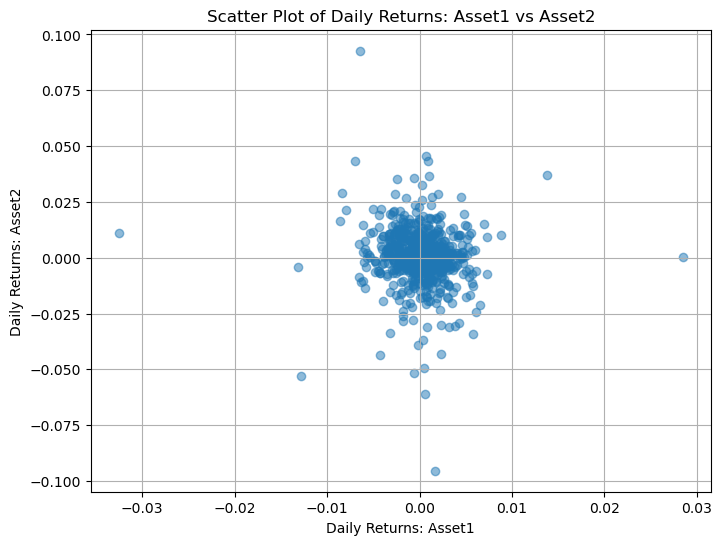

In [6]:
asset_x = "Asset1"   
asset_y = "Asset2"   
#asset_y = "Asset3"   
#asset_y = "Asset4"   
#asset_y = "Asset5"   

plt.figure(figsize=(8,6))
plt.scatter(daily_returns[asset_x], daily_returns[asset_y], alpha=0.5)
plt.xlabel(f"Daily Returns: {asset_x}")
plt.ylabel(f"Daily Returns: {asset_y}")
plt.title(f"Scatter Plot of Daily Returns: {asset_x} vs {asset_y}")
plt.grid(True)
plt.show()

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>

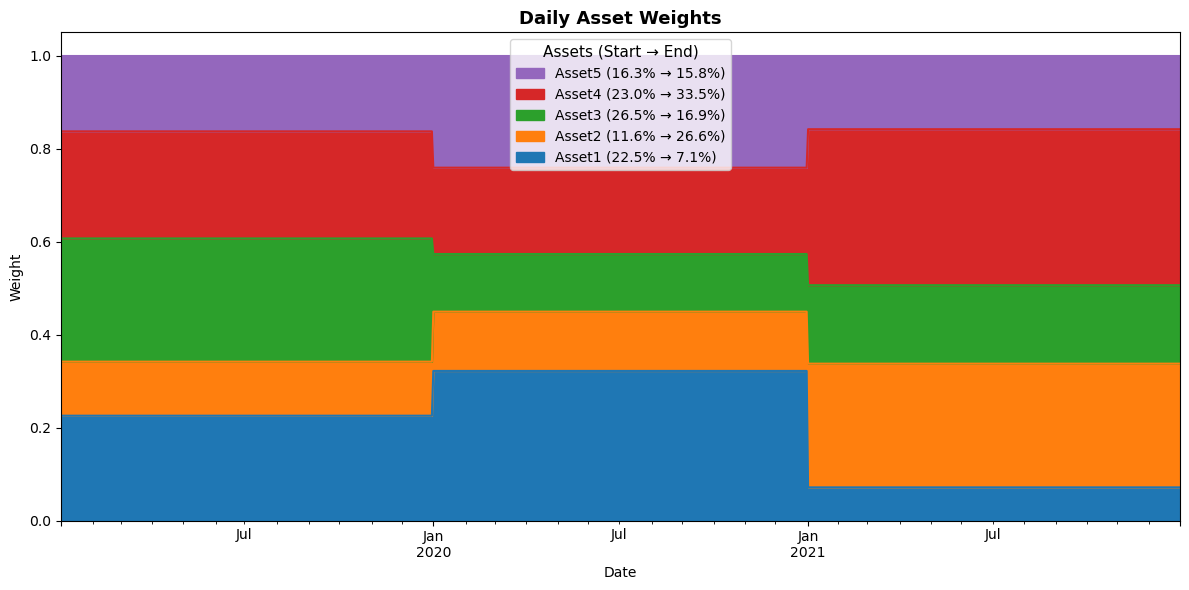

In [7]:
weights_df = pd.read_csv("/home/rafael/Área de Trabalho/CUROS IRONHACK/SEMANA_11/portfolio_analysis/data/raw/portfolio_weights.csv", parse_dates=["date"], index_col="date")

import matplotlib.pyplot as plt

weights_df_reversed = weights_df[weights_df.columns[::-1]]

# Calcular percentuais de início e fim do período
start_weights = weights_df.iloc[0] * 100
end_weights = weights_df.iloc[-1] * 100

# Criar gráfico de área
ax = weights_df.plot.area(figsize=(12,6), legend=False)

# Capturar as cores (handles) e nomes (labels)
handles, labels = ax.get_legend_handles_labels()

# Reverter a ordem para coincidir com o empilhamento visual (de cima para baixo)
handles = handles[::-1]
assets = weights_df.columns[::-1]

# Criar rótulos formatados com peso inicial e final
legend_labels = [
    f"{asset} ({start_weights[asset]:.1f}% → {end_weights[asset]:.1f}%)"
    for asset in assets
]

# Adicionar legenda com cores e % corretas
plt.legend(
    handles,
    legend_labels,
    title="Assets (Start → End)",
    loc="upper center",
    fontsize=10,
    title_fontsize=11,
    frameon=True,
)

# Personalizar o gráfico
plt.title("Daily Asset Weights", fontsize=13, weight='bold')
plt.ylabel("Weight")
plt.xlabel("Date")
plt.tight_layout()
plt.show()



<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>

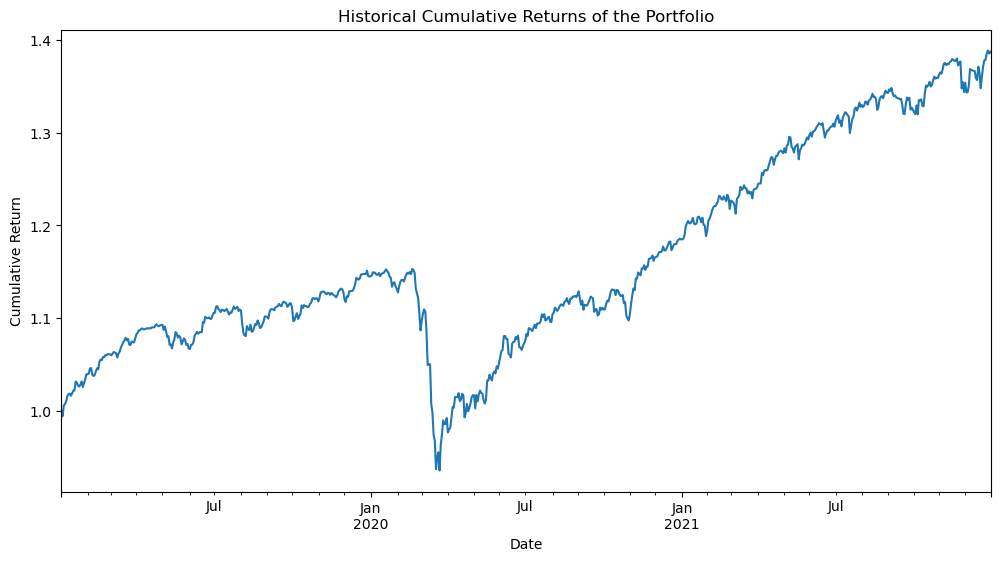

In [8]:
common_assets = weights_df.columns.intersection(daily_returns.columns)

# Portfolio daily returns
portfolio_returns = (weights_df[common_assets] * daily_returns[common_assets]).sum(axis=1)

# Cumulative return curve
cumulative_returns = (1 + portfolio_returns).cumprod()

plt.figure(figsize=(12,6))
cumulative_returns.plot()
plt.title("Historical Cumulative Returns of the Portfolio")
plt.ylabel("Cumulative Return")
plt.xlabel("Date")
plt.show()

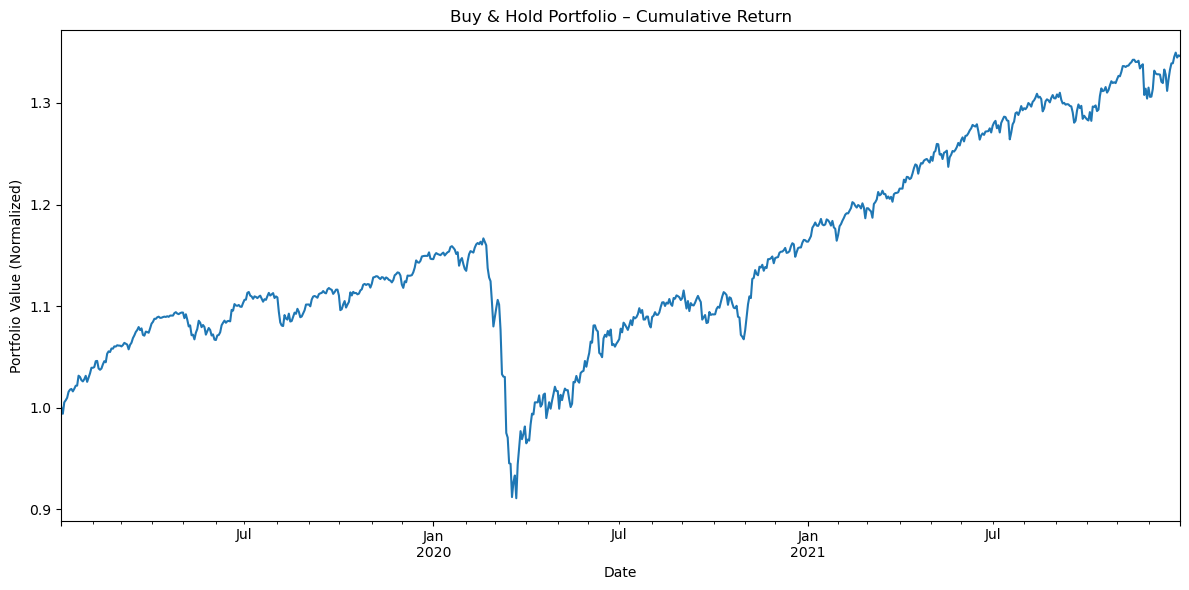

Buy & Hold Portfolio Return: 34.62%


In [16]:
# ============================================
# 1. USAR APENAS O PESO INICIAL DO PORTFÓLIO
# ============================================

initial_weights = weights_df.iloc[0]   # pega os pesos do primeiro dia
initial_weights = initial_weights / initial_weights.sum()  # normalizar (garantia)

# ============================================
# 2. NORMALIZAR OS PREÇOS
# ============================================

normalized_prices = df / df.iloc[0]

# ============================================
# 3. VALOR DO PORTFÓLIO AO LONGO DO TEMPO (BUY & HOLD)
# ============================================

portfolio_value_bh = (normalized_prices * initial_weights).sum(axis=1)

# ============================================
# 4. PLOTAR
# ============================================

plt.figure(figsize=(12,6))
portfolio_value_bh.plot()
plt.title("Buy & Hold Portfolio – Cumulative Return")
plt.ylabel("Portfolio Value (Normalized)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

# ============================================
# 5. RETORNO FINAL (%)
# ============================================

buy_and_hold_return = (portfolio_value_bh.iloc[-1] - 1) * 100
print(f"Buy & Hold Portfolio Return: {buy_and_hold_return:.2f}%")


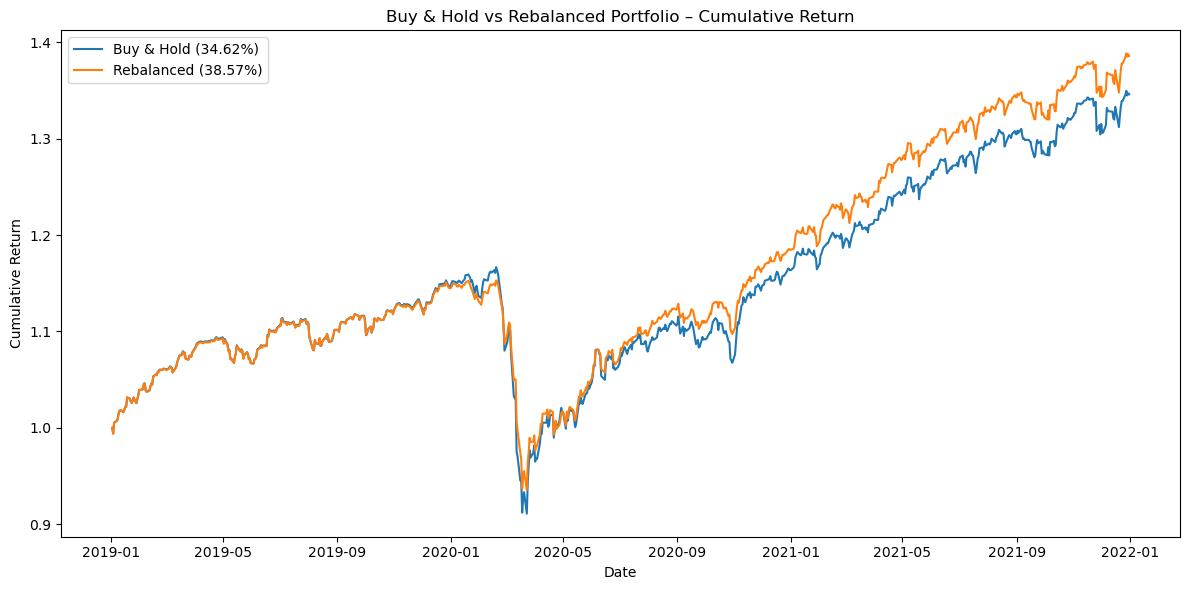

In [17]:
import matplotlib.pyplot as plt

# ============================================
# 1. Cálculo do retorno Buy & Hold
# ============================================

# Pesos iniciais (primeiro dia)
initial_weights = weights_df.iloc[0]
initial_weights = initial_weights / initial_weights.sum()

# Preços normalizados
normalized_prices = df / df.iloc[0]

# Buy & Hold portfolio value
portfolio_bh = (normalized_prices * initial_weights).sum(axis=1)
bh_return = (portfolio_bh.iloc[-1] - 1) * 100  # %

# ============================================
# 2. Cálculo do retorno com rebalanceamento diário
# ============================================

common_assets = weights_df.columns.intersection(daily_returns.columns)
portfolio_rebalanced = (weights_df[common_assets] * daily_returns[common_assets]).sum(axis=1)
portfolio_rebalanced_cum = (1 + portfolio_rebalanced).cumprod()
rb_return = (portfolio_rebalanced_cum.iloc[-1] - 1) * 100  # %

# ============================================
# 3. Plotar ambos no mesmo gráfico
# ============================================

plt.figure(figsize=(12,6))

# Plotando Buy & Hold
plt.plot(portfolio_bh.index, portfolio_bh.values, label=f"Buy & Hold ({bh_return:.2f}%)")

# Plotando Rebalanced
plt.plot(portfolio_rebalanced_cum.index, portfolio_rebalanced_cum.values, label=f"Rebalanced ({rb_return:.2f}%)")

# Estilo do gráfico
plt.title("Buy & Hold vs Rebalanced Portfolio – Cumulative Return")
plt.ylabel("Cumulative Return")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.show()


<h2 style="color: #FF6347;">Annualized Return.</h2>

In [9]:
total_period_return = cumulative_returns.iloc[-1] - 1
days = len(cumulative_returns)

annualized_return = (1 + total_period_return) ** (261 / days) - 1
print("Annualized Return:", annualized_return)


Annualized Return: 0.11487091067617072


<h2 style="color: #FF6347;">Annualized Volatility.</h2>

In [10]:
annualized_volatility = portfolio_returns.std() * (261 ** 0.5)
print("Annualized Volatility:", annualized_volatility)

Annualized Volatility: 0.08507237920946549


<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>

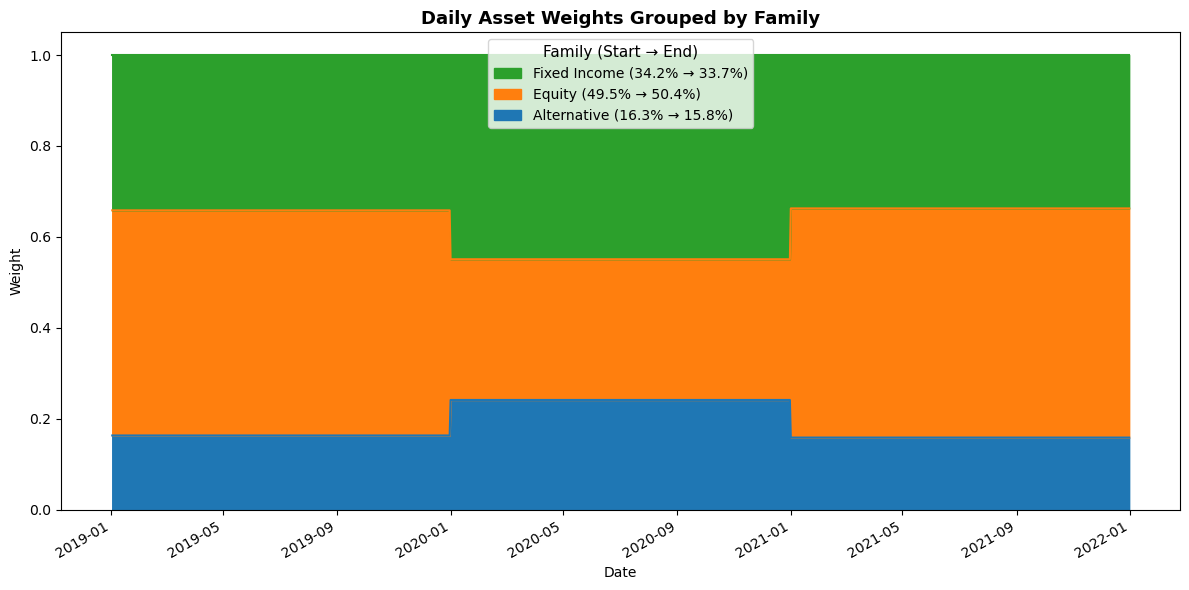

In [30]:
asset_info = pd.read_csv("/home/rafael/Área de Trabalho/CUROS IRONHACK/SEMANA_11/portfolio_analysis/data/raw/asset_information_data.csv")

import matplotlib.pyplot as plt
import pandas as pd

# Garantir que apenas ativos presentes nos pesos sejam usados
asset_info = asset_info[asset_info["Name"].isin(weights_df.columns)]

# Juntar a coluna 'Family' e agrupar
temp = weights_df.T.join(asset_info.set_index("Name"))
weights_by_family = temp.groupby("Family").sum().T

# Calcular pesos iniciais e finais (%)
start_weights = weights_by_family.iloc[0] * 100
end_weights = weights_by_family.iloc[-1] * 100

# Criar gráfico de área
ax = weights_by_family.plot.area(figsize=(12,6), legend=False)

# Capturar cores (handles) e nomes (labels)
handles, labels = ax.get_legend_handles_labels()

# Reverter ordem para coincidir com o empilhamento visual (de cima para baixo)
handles = handles[::-1]
families = weights_by_family.columns[::-1]

# Criar rótulos formatados com peso inicial e final
legend_labels = [
    f"{family} ({start_weights[family]:.1f}% → {end_weights[family]:.1f}%)"
    for family in families
]

# Adicionar legenda com cores corretas e % exatas
plt.legend(
    handles,
    legend_labels,
    title="Family (Start → End)",
    loc="upper center",
    fontsize=10,
    title_fontsize=11,
    frameon=True,
)

# Personalizar o gráfico
plt.title("Daily Asset Weights Grouped by Family", fontsize=13, weight='bold')
plt.ylabel("Weight")
plt.xlabel("Date")
plt.tight_layout()
plt.show()
